In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import akey

In [2]:
file2 = 'api-data/all_info.csv'
all_stocks = pd.read_csv(file2)
ryam = all_stocks[all_stocks['Ticker'] == 'RYAM']
ryam['Date'] = pd.to_datetime(ryam['Date'], format='%Y-%m-%d')
ryam.set_index('Date', inplace=True)
ryam.drop(columns=['Year', 'Month','Industry','Sector','Full Time Emp','Ticker'], inplace=True)
ryam.rename(columns={'Close': 'RYAM'},inplace=True)
ryam_ema = ryam.ewm(span=6, adjust=False).mean()

C:\Users\jonrs\anaconda3\envs\case_python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jonrs\anaconda3\envs\case_python\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\jonrs\anaconda3\envs\case_python\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

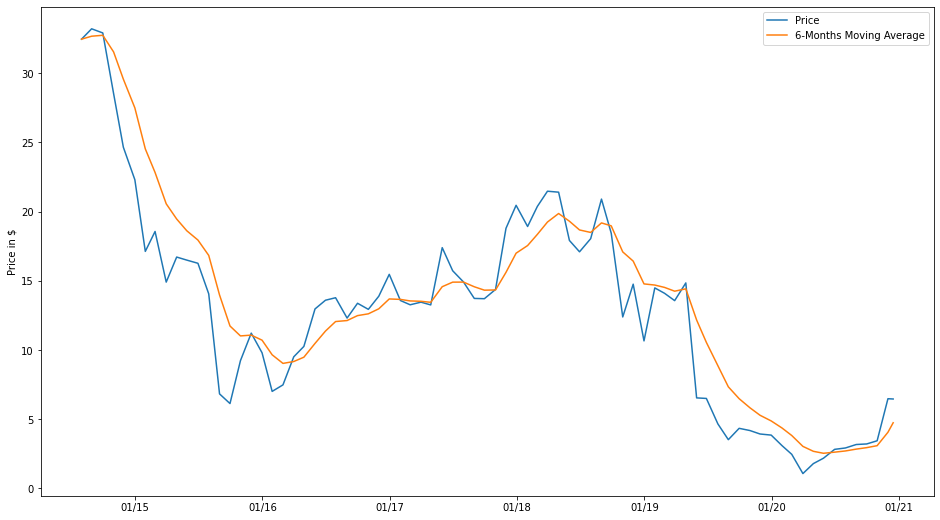

In [3]:
fig, ax = plt.subplots(figsize=(16,9))
start_date = '2014-07-31'
end_date = '2020-12-15'
my_year_month_fmt = dates.DateFormatter('%m/%y')
ax.plot(ryam.loc[start_date:end_date, :].index, ryam.loc[start_date:end_date, 'RYAM'], label='Price')
ax.plot(ryam_ema.loc[start_date:end_date, :].index, ryam_ema.loc[start_date:end_date, 'RYAM'], label = '6-Months Moving Average')


ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [4]:
all_stocks.head()


,Date,Close,Ticker,Year,Month,Industry,Sector,Full Time Emp
0,1999-12-31,20.00,CLB,1999,12,Energy,Oil & Gas Equipment & Services,3800.0
1,1999-12-31,10.38,CENT,1999,12,Consumer Defensive,Packaged Foods,5600.0
2,1999-12-31,0.08,RDNT,1999,12,Healthcare,Diagnostics & Research,6165.0
3,1999-12-31,11.63,ESE,1999,12,Technology,Scientific & Technical Instruments,2713.0
4,1999-12-31,20.75,FBP,1999,12,Financial Services,Banks-Regional,2674.0


In [5]:
industry = ['Basic Materials','Consumer Defensive','Technology']
selected = all_stocks.loc[all_stocks['Industry'].isin(industry)]
pct_chg2020 = 'api-data/yearly_summary/ticker_pct_chg_2020.csv'
changes = pd.read_csv(pct_chg2020)
sel_changes = changes.loc[changes['Industry'].isin(industry)]
sel_changes.sort_values('pct change', inplace=True, ascending=False)
top20 = sel_changes.nlargest(20, columns='pct change')

C:\Users\jonrs\anaconda3\envs\case_python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
selected['Date'] = pd.to_datetime(selected['Date'], format='%Y-%m-%d')
selected.drop(columns=['Year', 'Month','Industry','Sector','Full Time Emp'], inplace=True)
#selected.reset_index()


C:\Users\jonrs\anaconda3\envs\case_python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jonrs\anaconda3\envs\case_python\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
top20

,Ticker,pct change,Industry,Sector,Full Time Emp,Year
303,STMP,63.118285,Technology,Software-Application,1313.0,2020
164,UNFI,52.349437,Consumer Defensive,Food Distribution,28300.0,2020
349,RYAM,52.248062,Basic Materials,Chemicals,4000.0,2020
198,CENX,50.606909,Basic Materials,Aluminum,2079.0,2020
537,TTEC,49.362570,Technology,Information Technology Services,56200.0,2020
571,BRKS,49.145299,Technology,Semiconductor Equipment & Materials,3159.0,2020
354,CLF,48.153619,Basic Materials,Steel,2372.0,2020
555,FIZZ,47.931076,Consumer Defensive,Beverages-Non-Alcoholic,1550.0,2020
144,ALRM,47.269235,Technology,Software-Application,1361.0,2020
88,MSTR,46.803597,Technology,Software-Application,2073.0,2020


In [17]:
choice = selected.pivot(index='Date',columns='Ticker', values='Close')

choice.fillna(0, inplace=True)
choice['Total'] = choice.mean(axis=1)
choice

Ticker,AAOI,ACLS,ADTN,AGYS,ALRM,ANDE,APEI,ASIX,AVD,BCC,...,UVV,VECO,VGR,VIAV,VICR,VRTU,WDFC,XPER,ZEUS,Total
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,0.00,0.00,51.440,14.44,0.00,8.250,0.00,0.00,6.13,0.00,...,22.81,46.81,14.94,0.000,40.50,0.00,22.13,0.00,4.75,19.253066
2000-01-31,0.00,0.00,64.750,13.64,0.00,7.563,0.00,0.00,6.75,0.00,...,20.44,54.88,16.19,0.000,40.75,0.00,18.75,0.00,4.50,18.696493
2000-02-29,0.00,0.00,73.560,18.38,0.00,7.625,0.00,0.00,7.25,0.00,...,16.38,82.13,13.25,0.000,22.75,0.00,18.50,0.00,4.50,22.670404
2000-03-31,0.00,0.00,59.440,15.75,0.00,7.000,0.00,0.00,7.88,0.00,...,15.06,74.00,12.19,0.000,18.00,0.00,21.00,0.00,4.00,20.079390
2000-04-28,0.00,0.00,67.560,15.31,0.00,7.469,0.00,0.00,8.87,0.00,...,18.88,62.13,13.88,0.000,26.00,0.00,19.94,0.00,4.75,18.744044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,11.63,23.63,11.090,25.37,59.87,17.730,31.44,12.73,14.15,45.80,...,43.41,11.89,10.07,13.335,87.03,39.54,204.38,12.53,11.00,43.517610
2020-09-30,11.25,22.00,10.255,24.16,55.25,19.170,28.19,12.88,13.14,39.92,...,41.88,11.67,9.69,11.730,77.73,49.16,189.31,11.49,11.36,41.392243
2020-10-30,8.78,22.07,10.690,27.08,58.33,21.690,28.27,15.22,12.92,38.38,...,39.85,12.73,9.19,12.350,78.00,50.30,243.38,12.40,11.41,42.961838


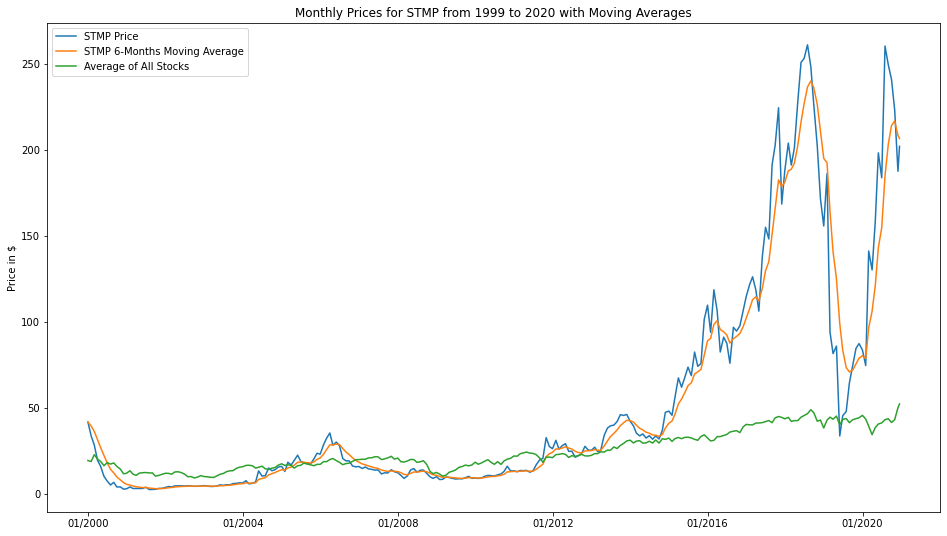

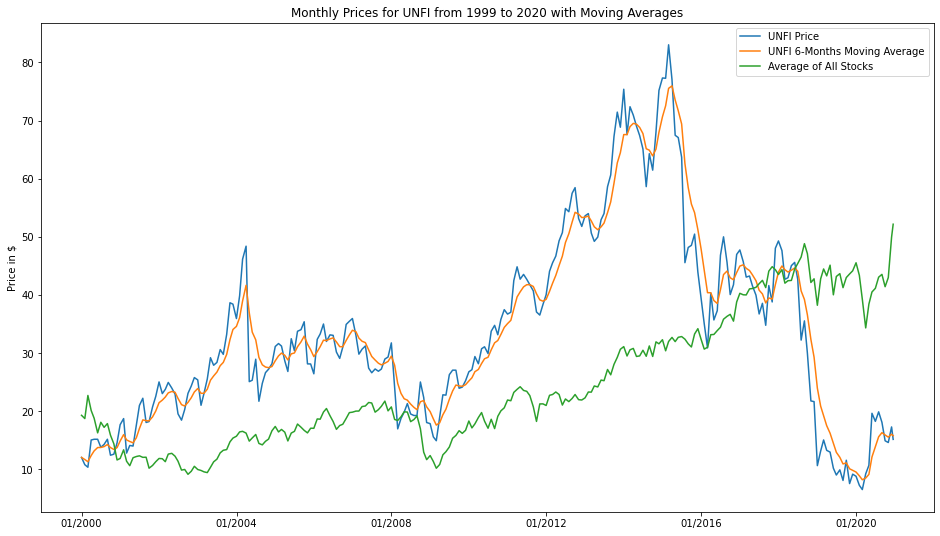

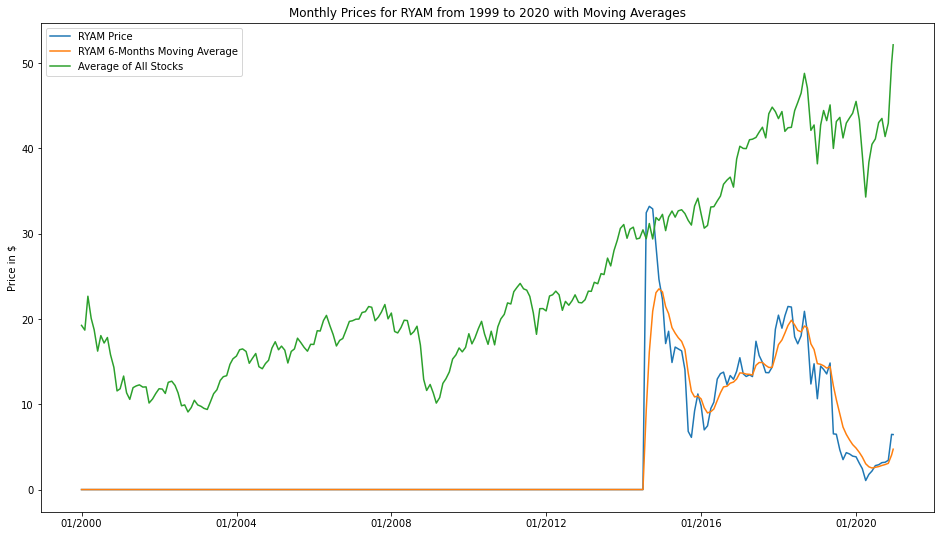

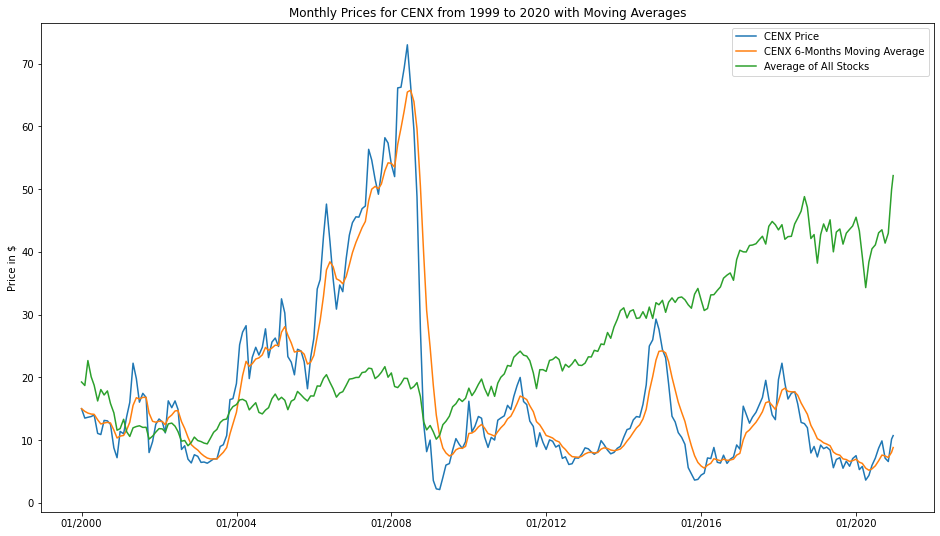

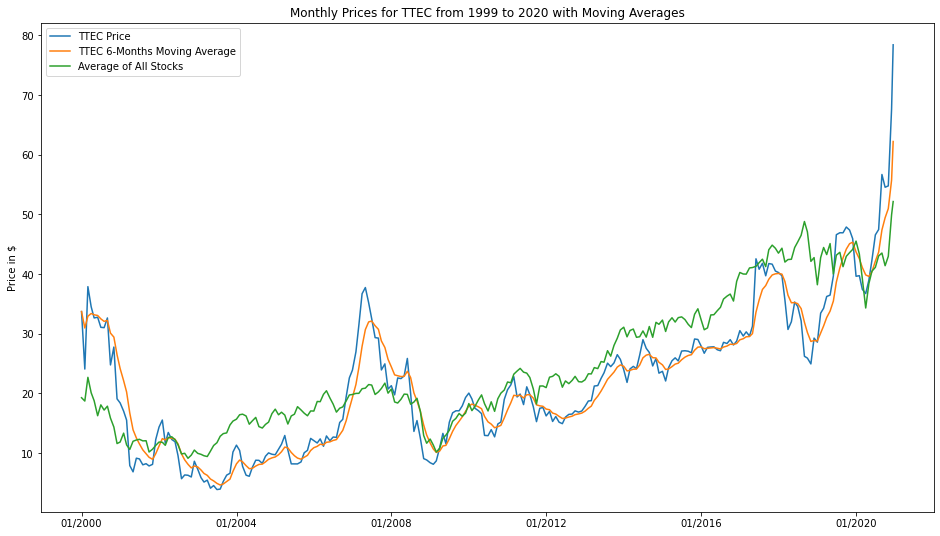

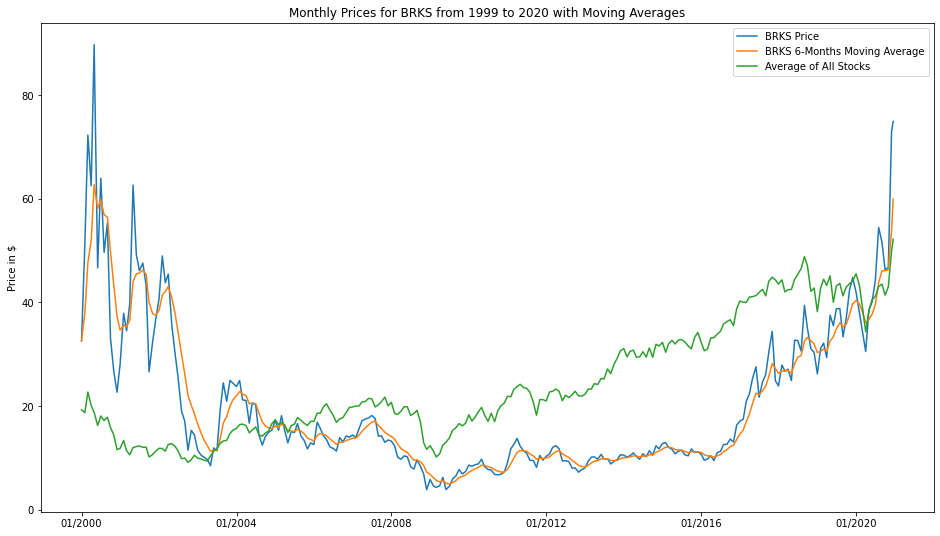

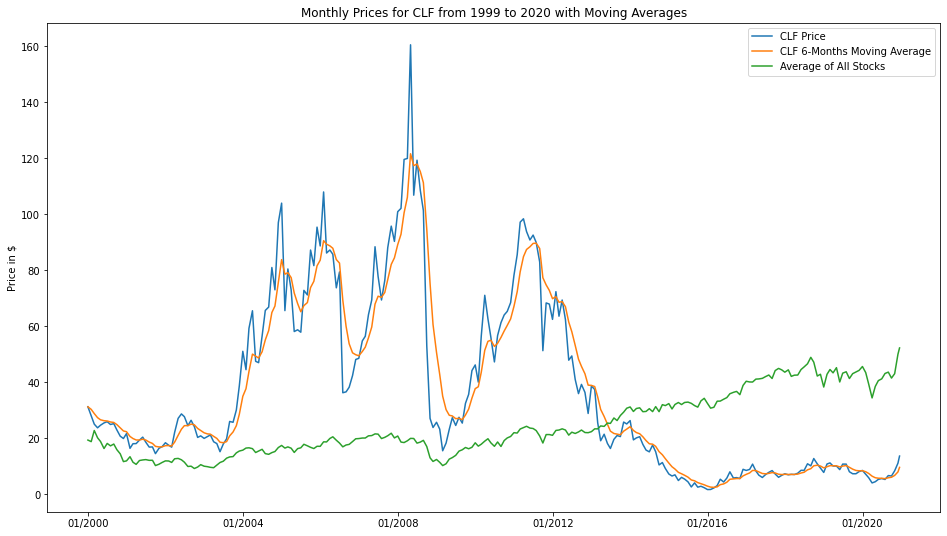

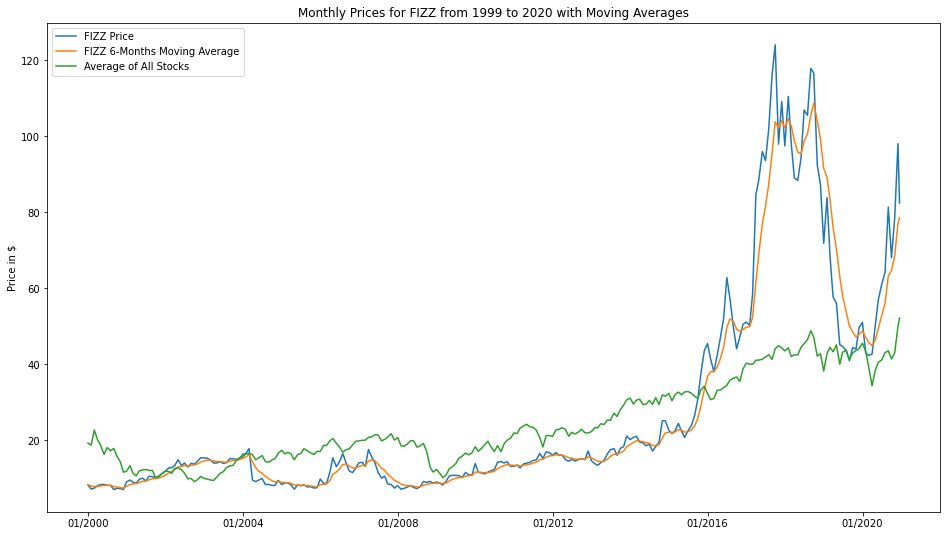

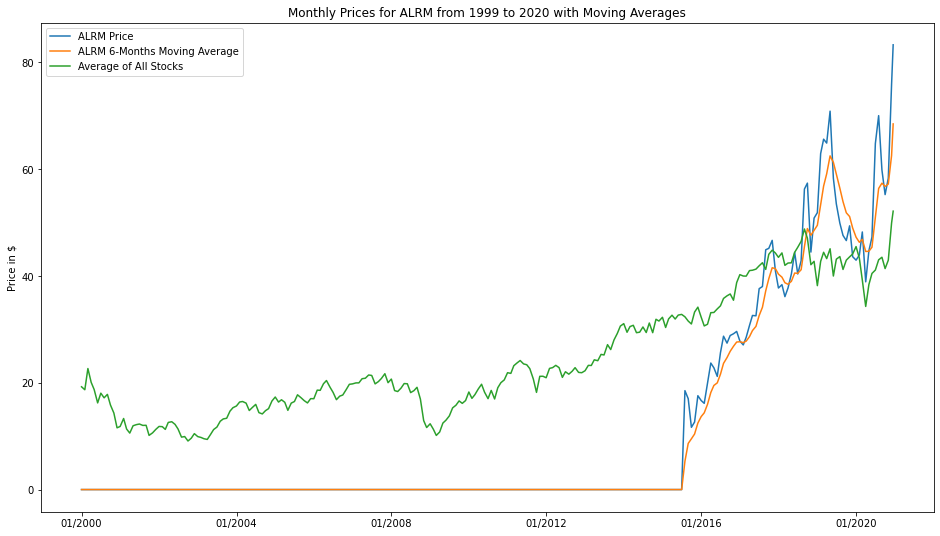

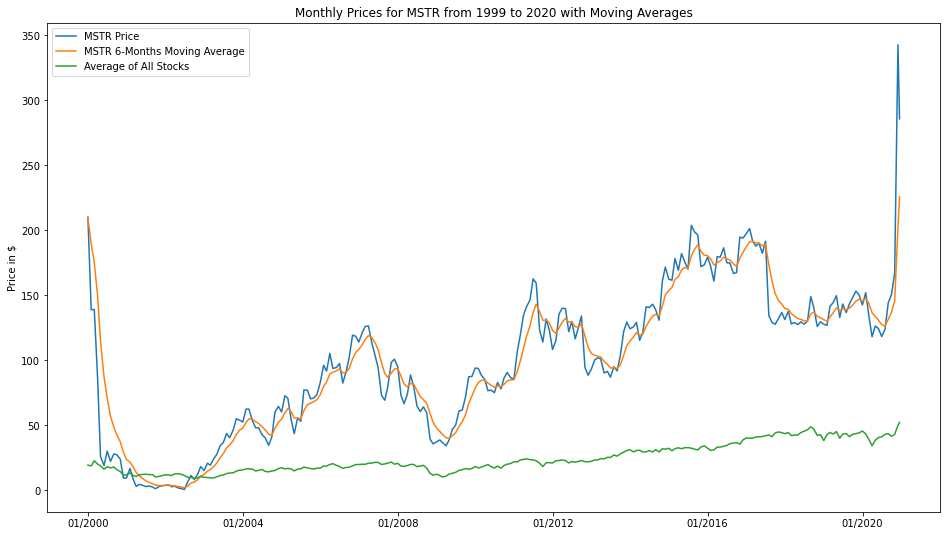

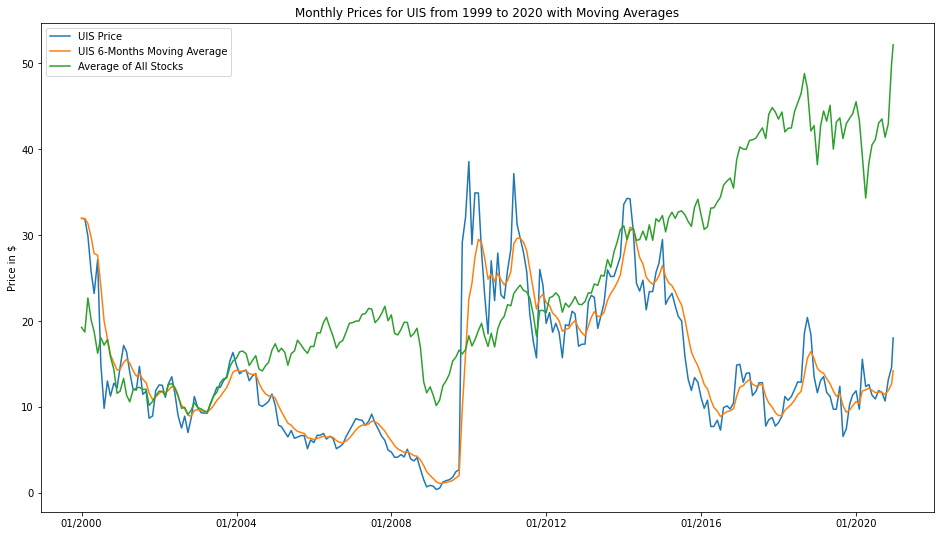

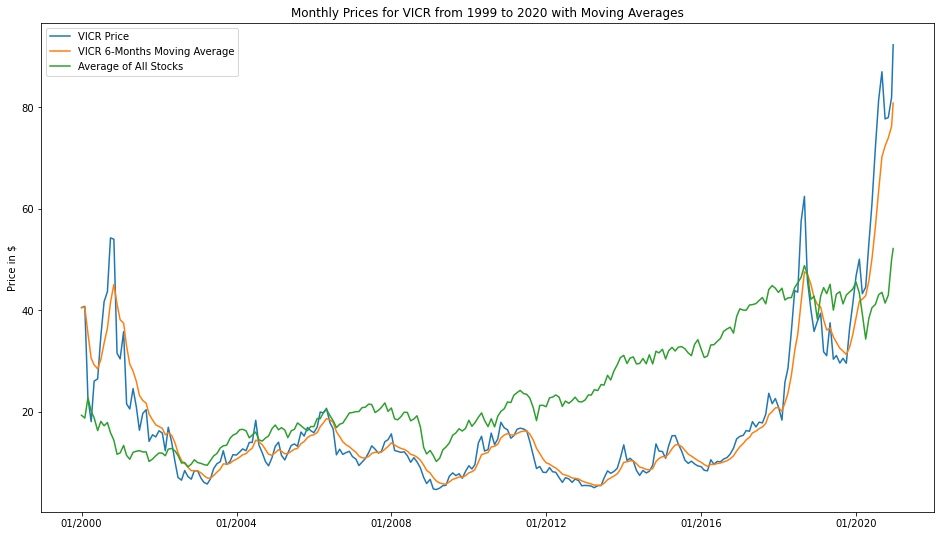

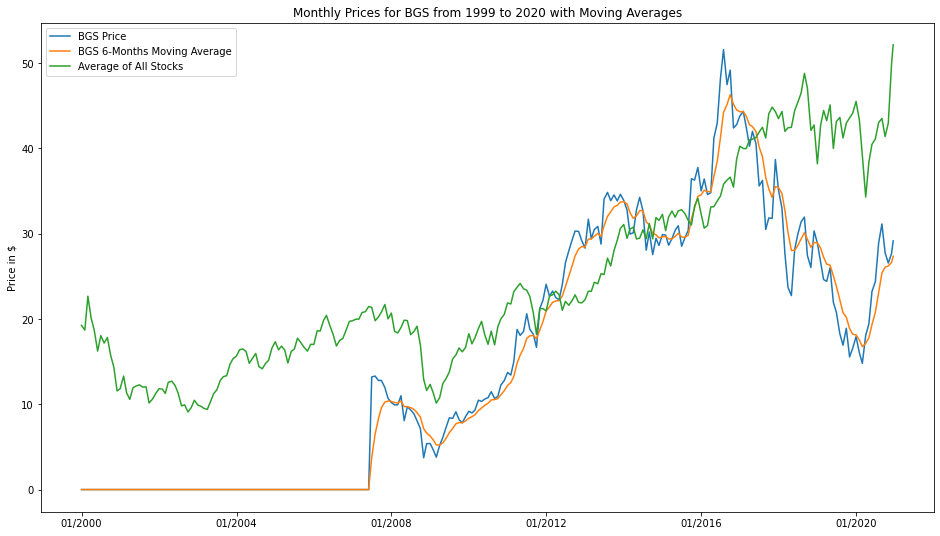

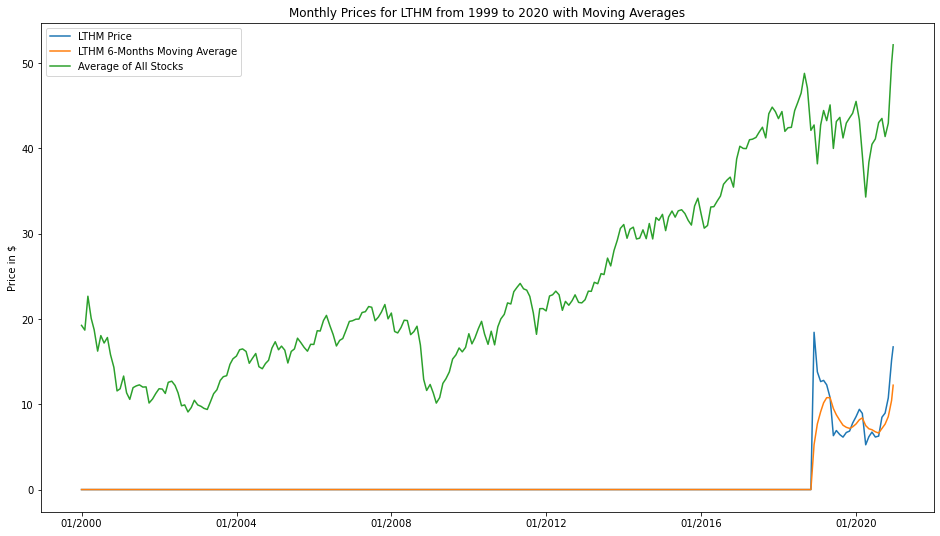

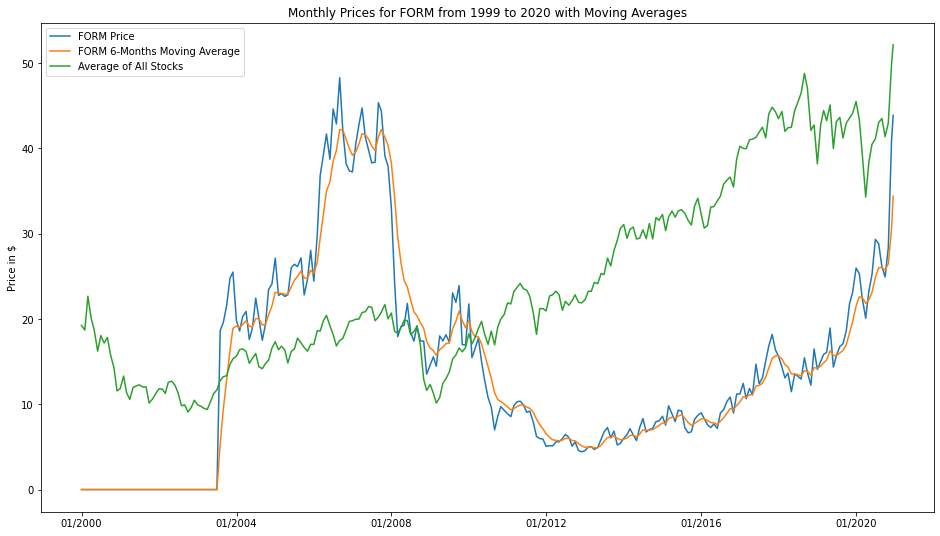

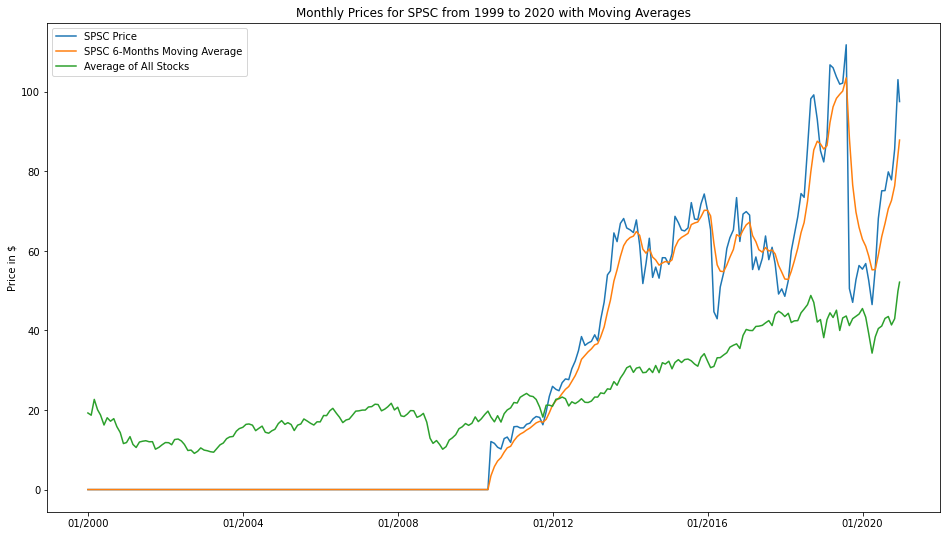

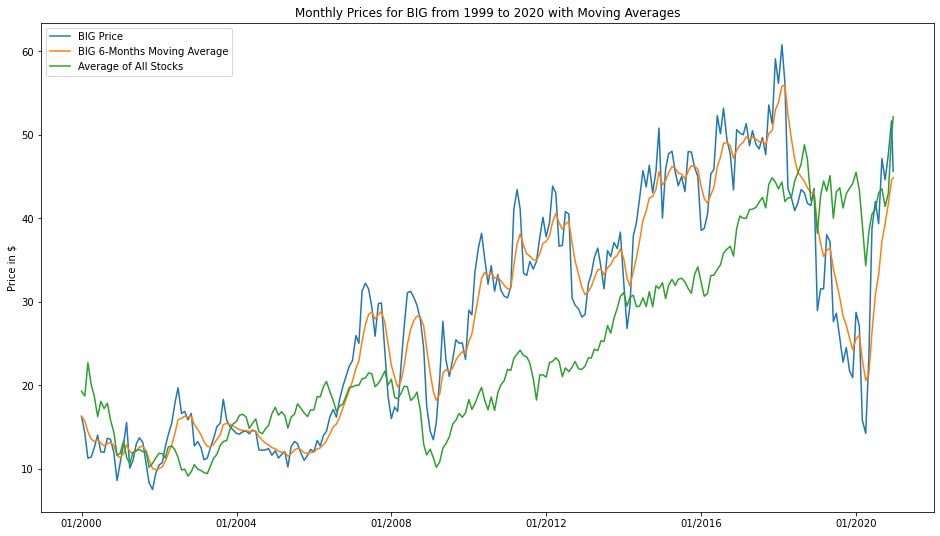

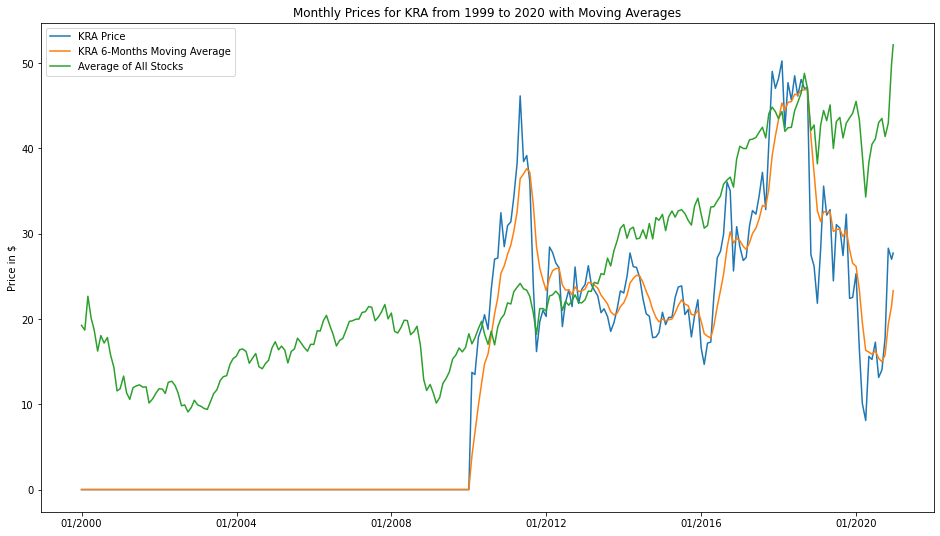

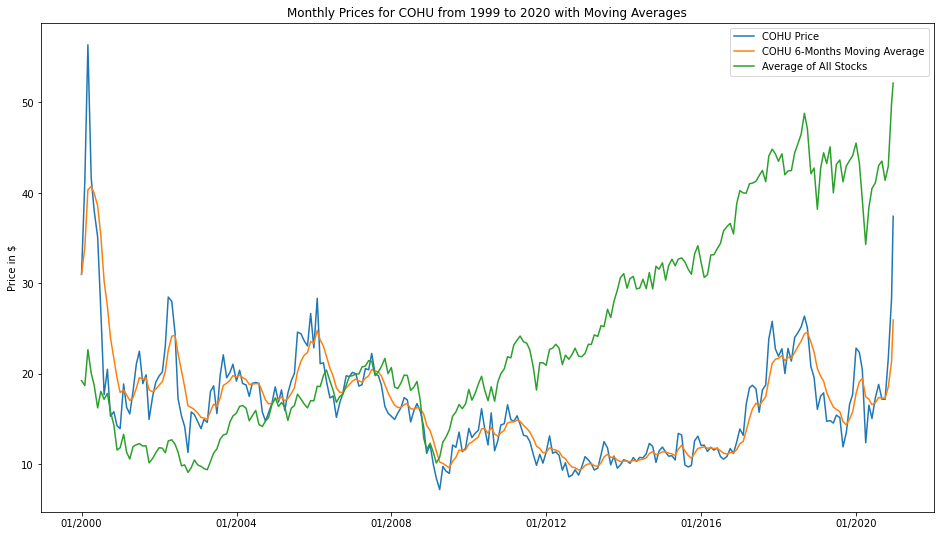

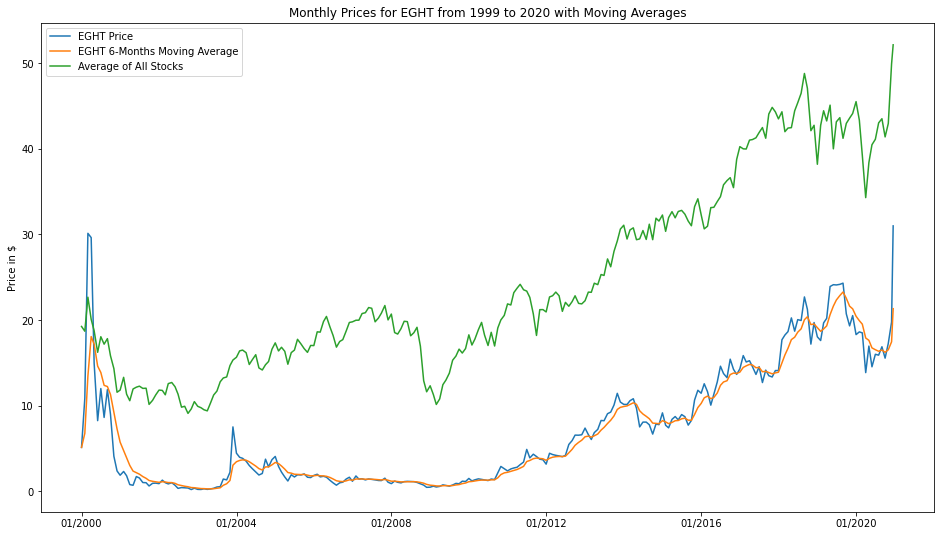

In [34]:
start_date = '1999-12-31'
end_date = '2020-12-15'
tickers = top20['Ticker'].to_list()
for ticker in tickers:
    
    fig, ax = plt.subplots(figsize=(16,9))
    my_year_month_fmt = dates.DateFormatter('%m/%Y')
    choice_ema = choice.ewm(span=6, adjust=False).mean()
    ax.plot(choice.loc[start_date:end_date, :].index, choice.loc[start_date:end_date, ticker], label=f'{ticker} Price')
    ax.plot(choice_ema.loc[start_date:end_date, :].index, choice_ema.loc[start_date:end_date, ticker], label = f'{ticker} 6-Months Moving Average')
    ax.plot(choice.loc[start_date:end_date, :].index, choice.loc[start_date:end_date, 'Total'], label='Average of All Stocks')
    ax.legend(loc='best')
    ax.set_ylabel('Price in $')
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(my_year_month_fmt)
    ax.set_title(f'Monthly Prices for {ticker} from 1999 to 2020 with Moving Averages')
    fig.savefig(f'images/{ticker}_avg.png')

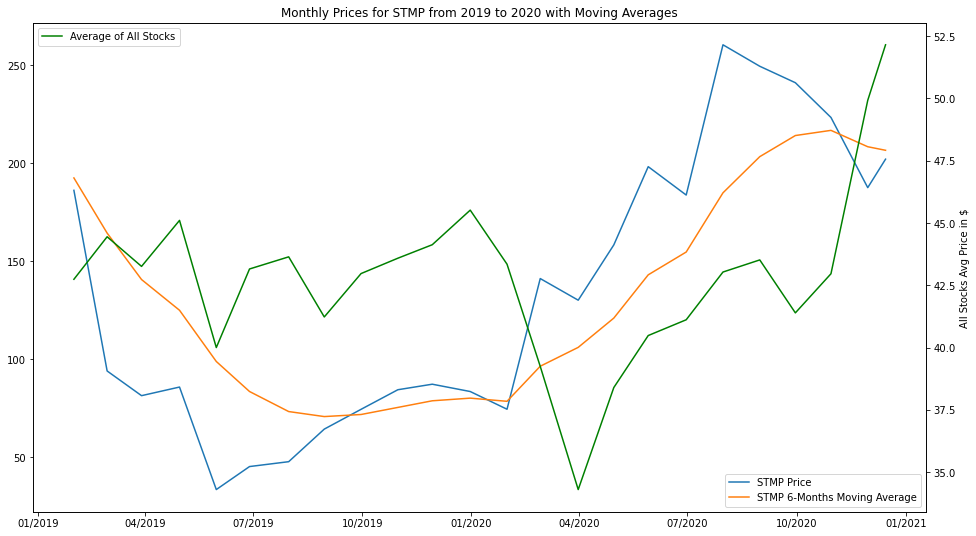

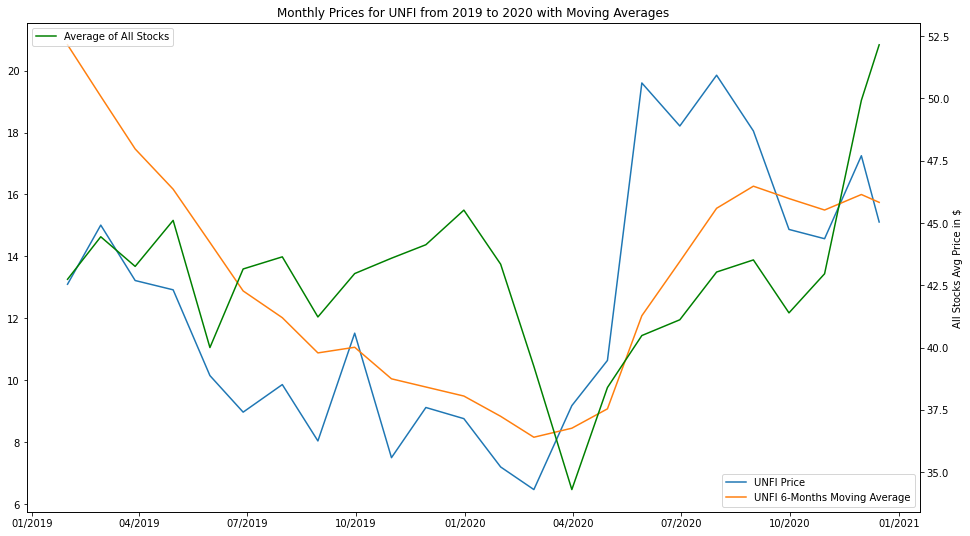

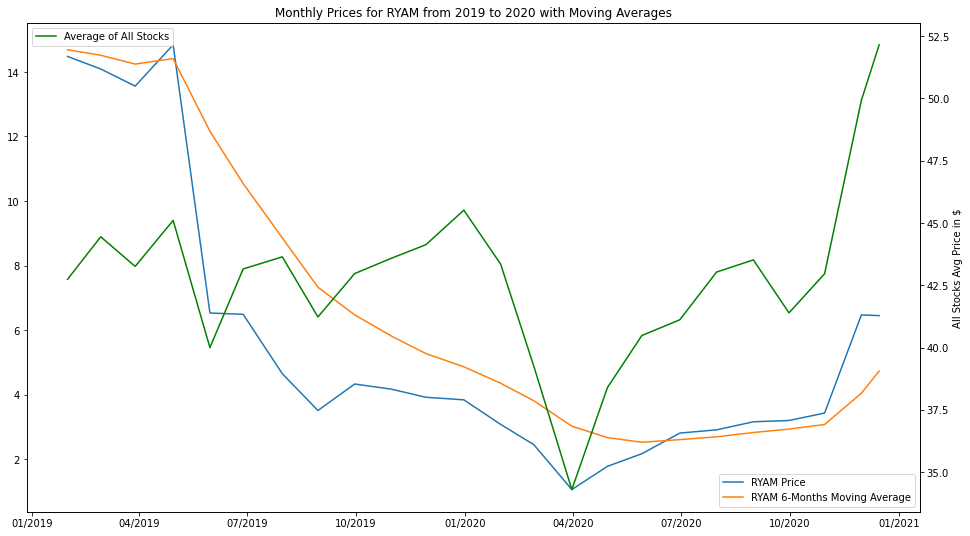

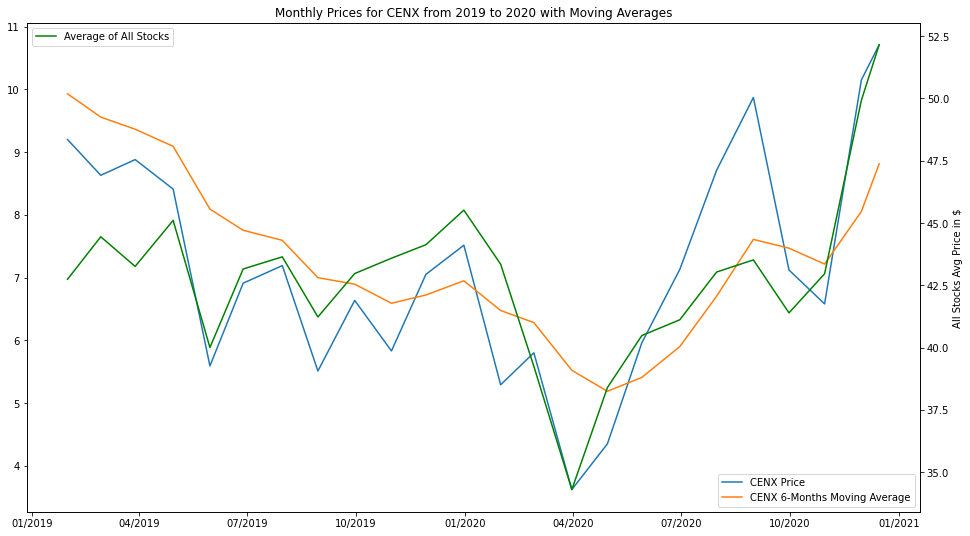

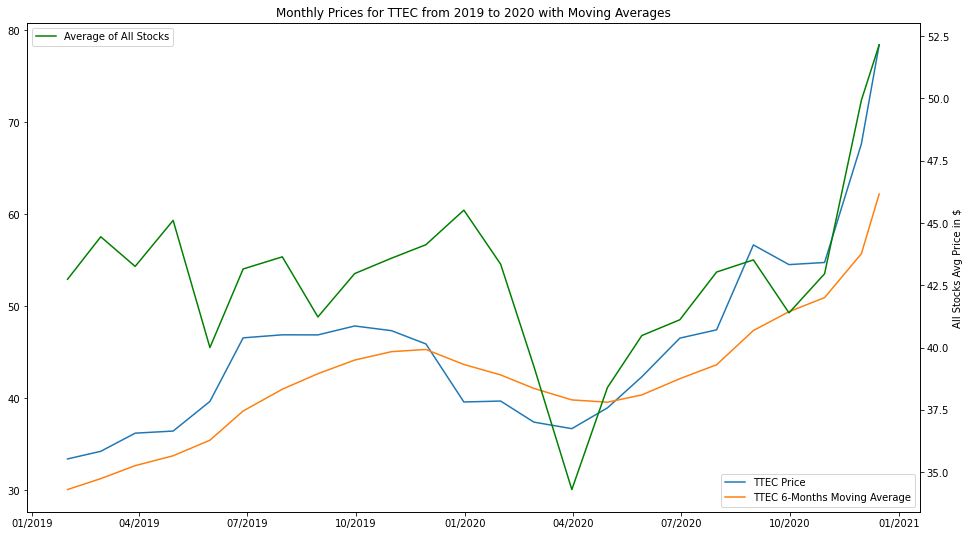

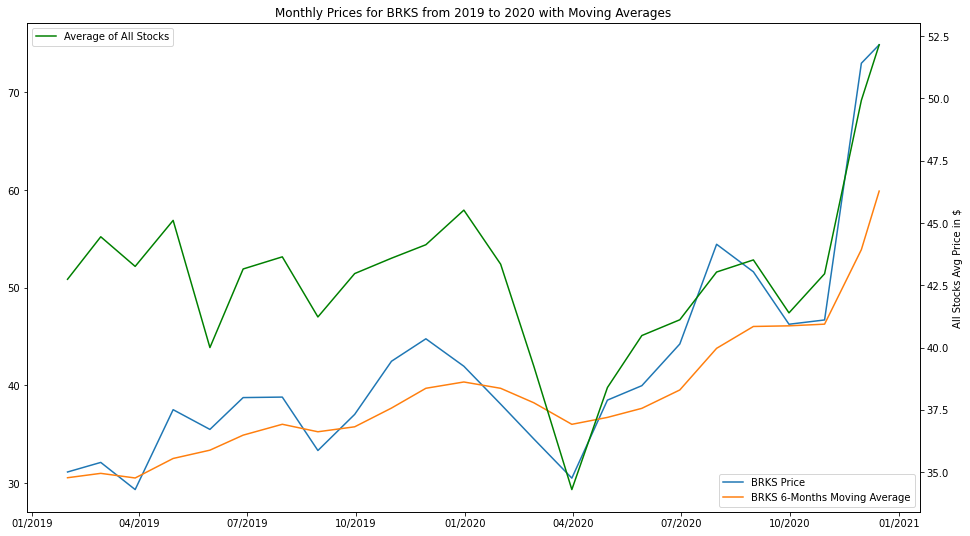

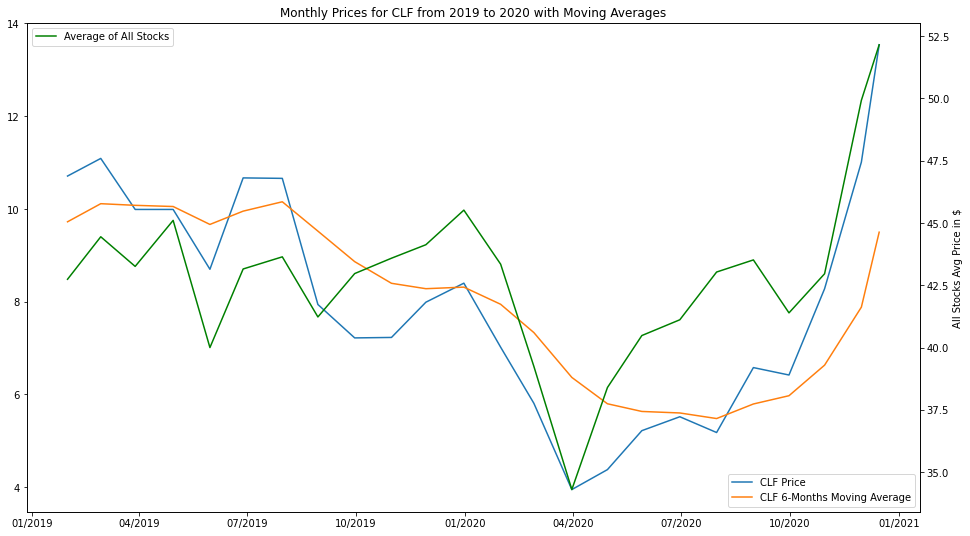

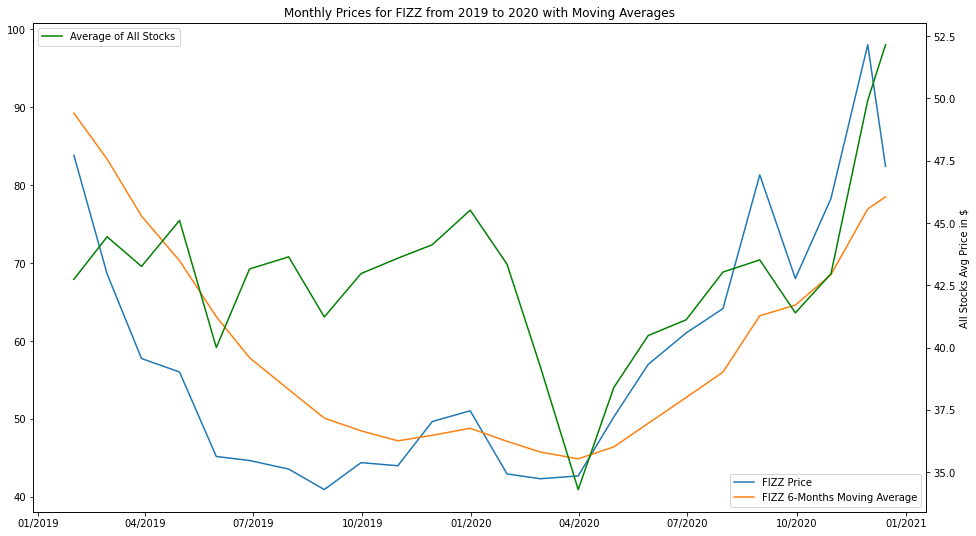

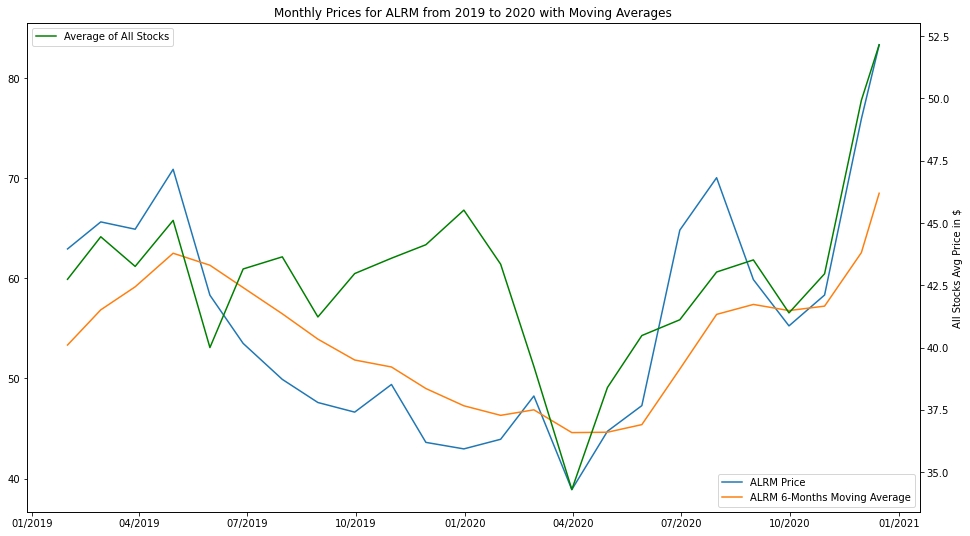

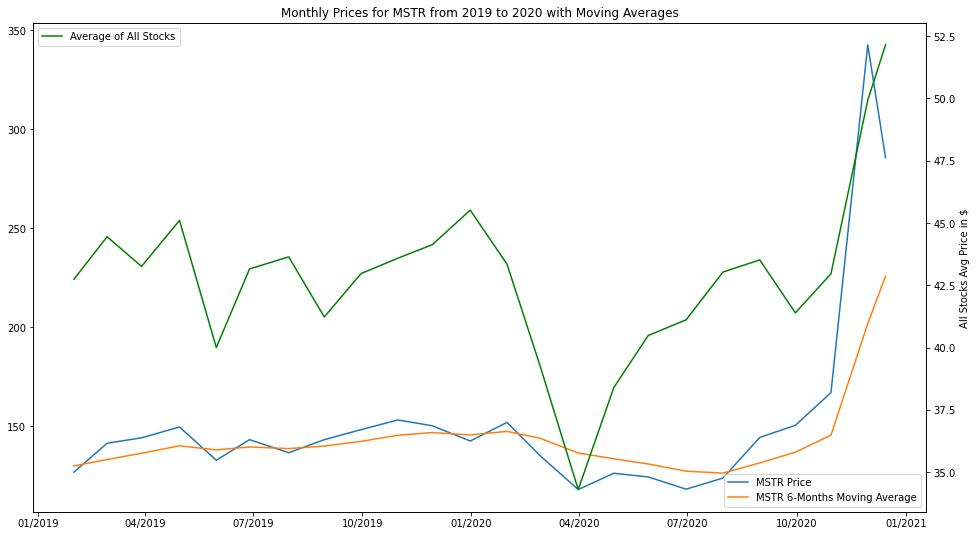

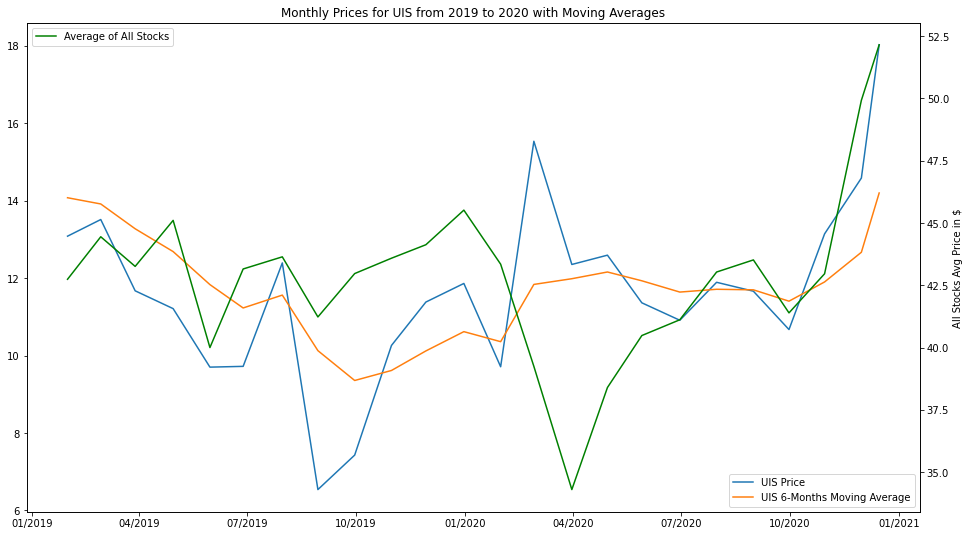

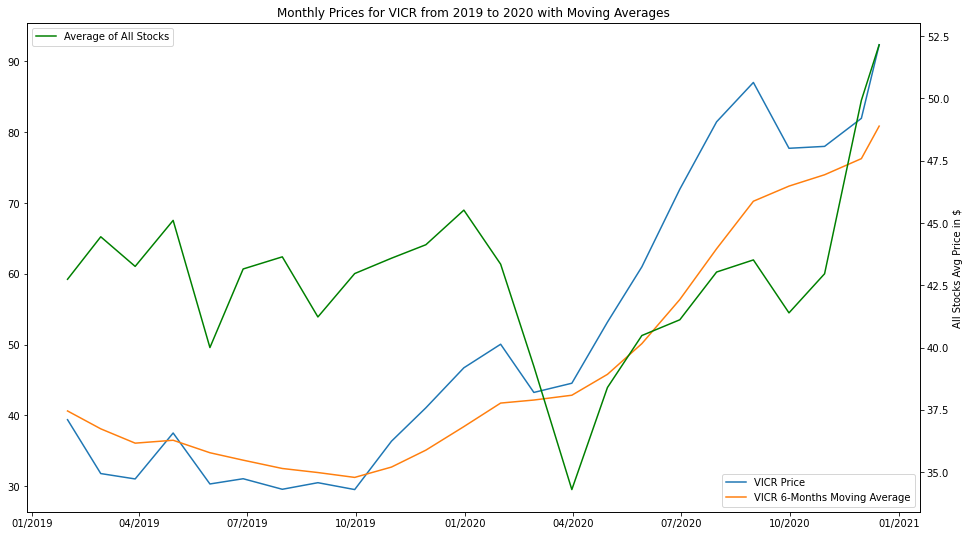

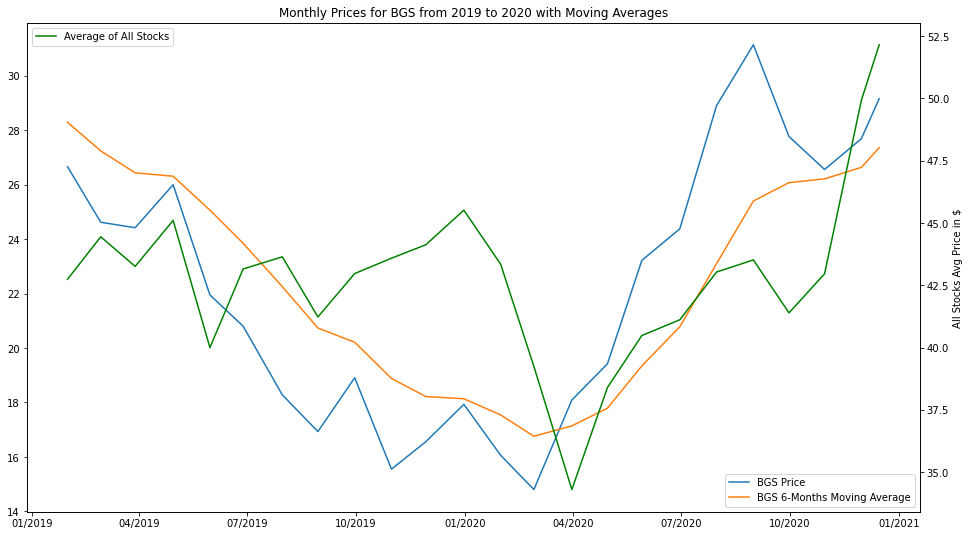

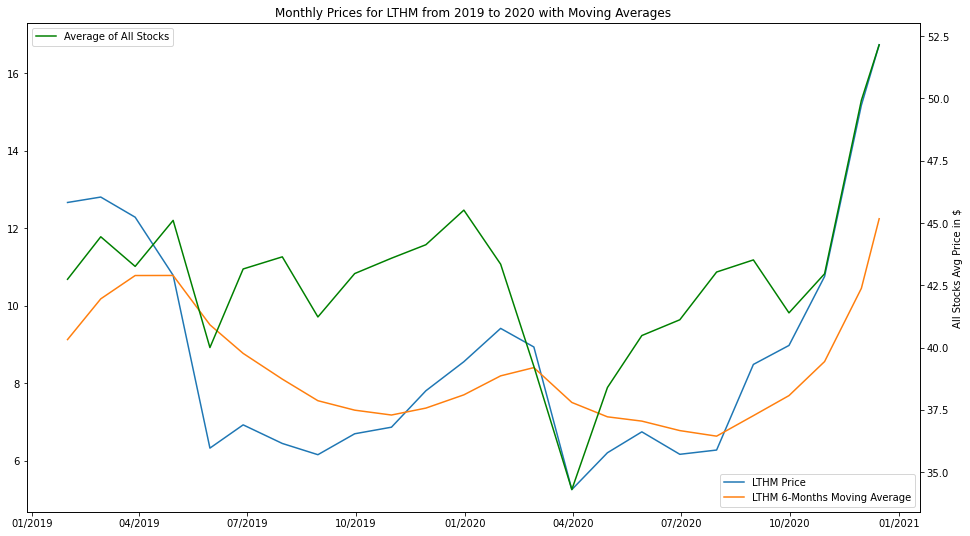

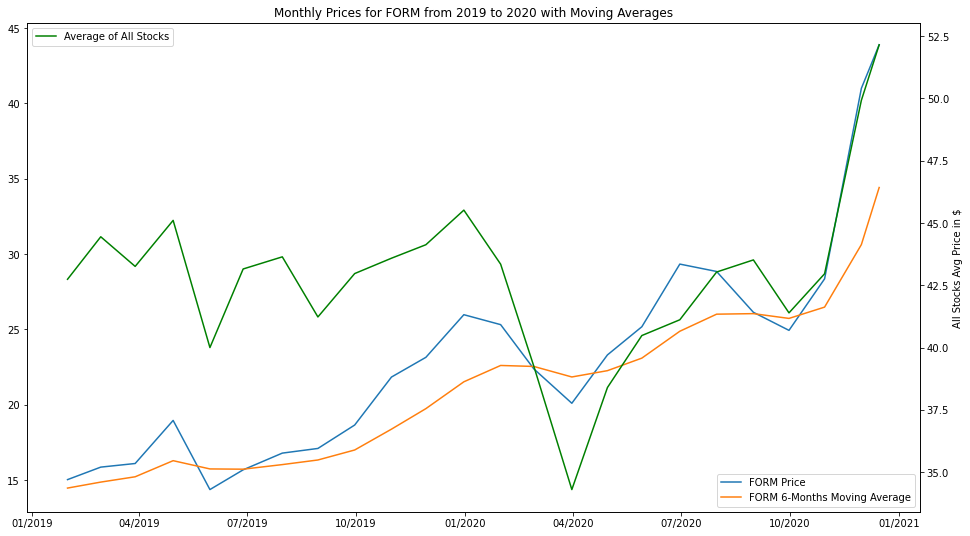

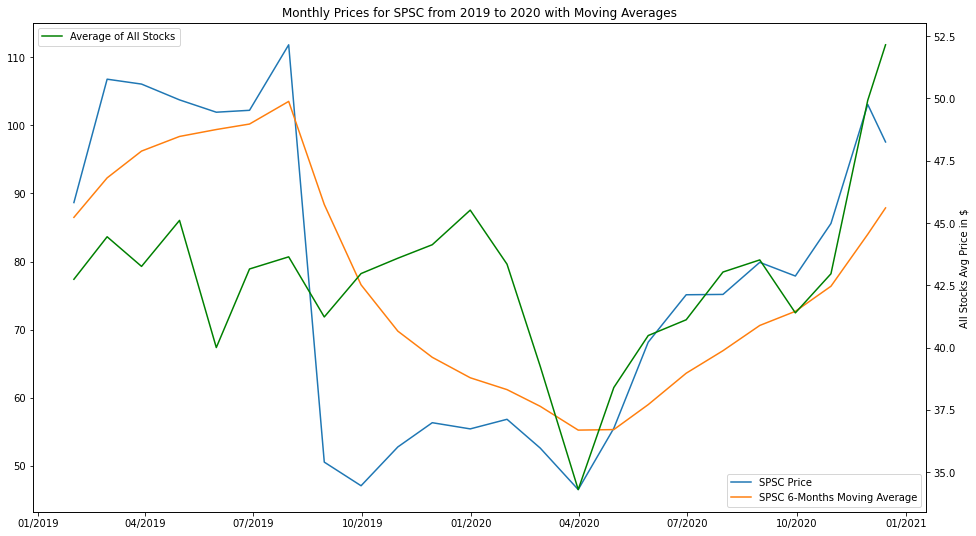

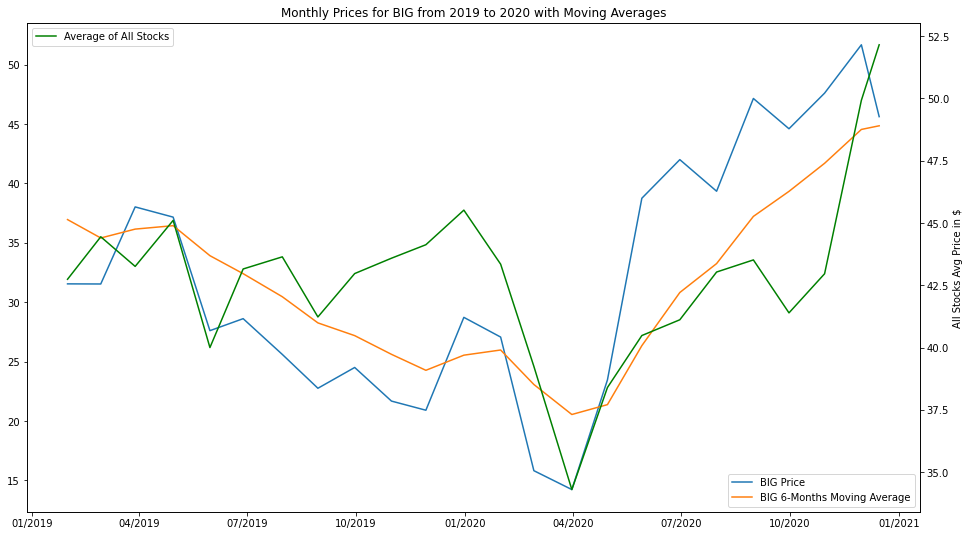

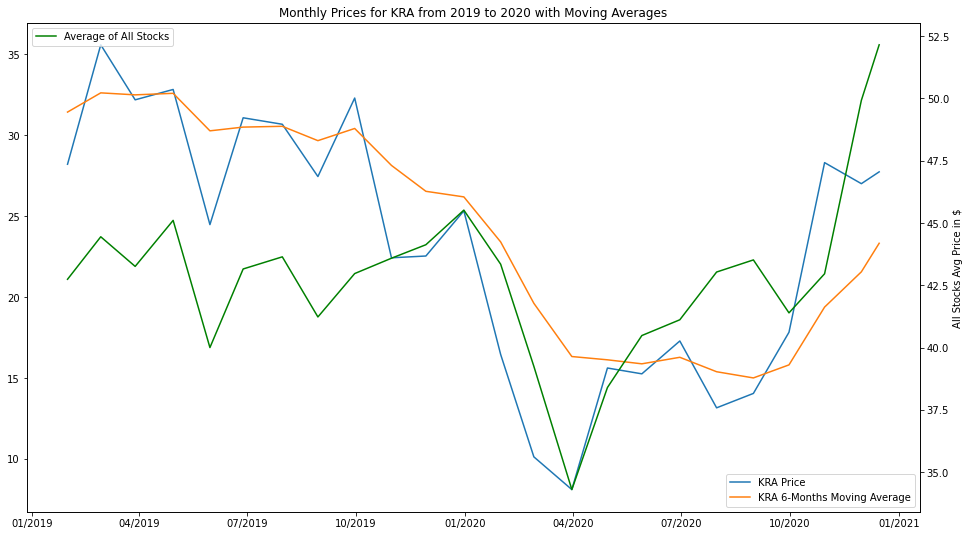

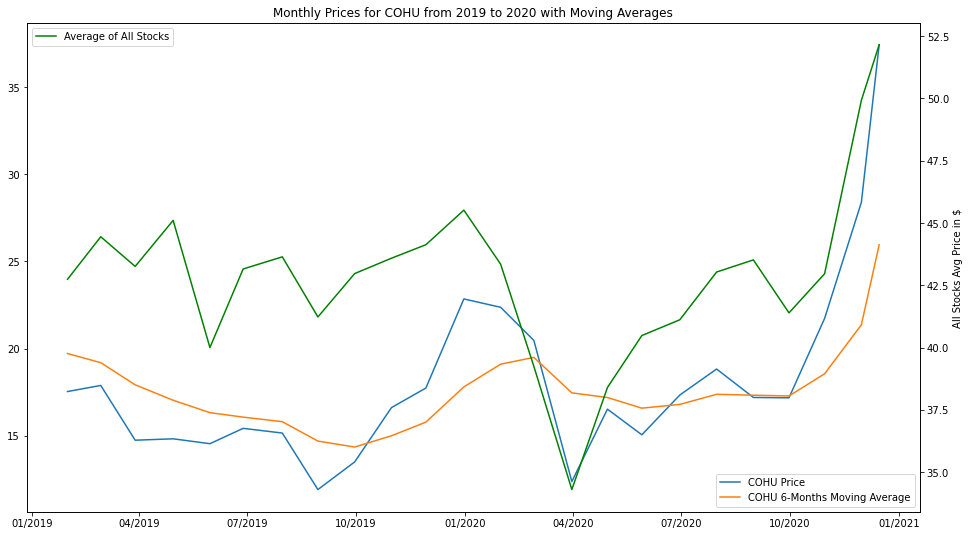

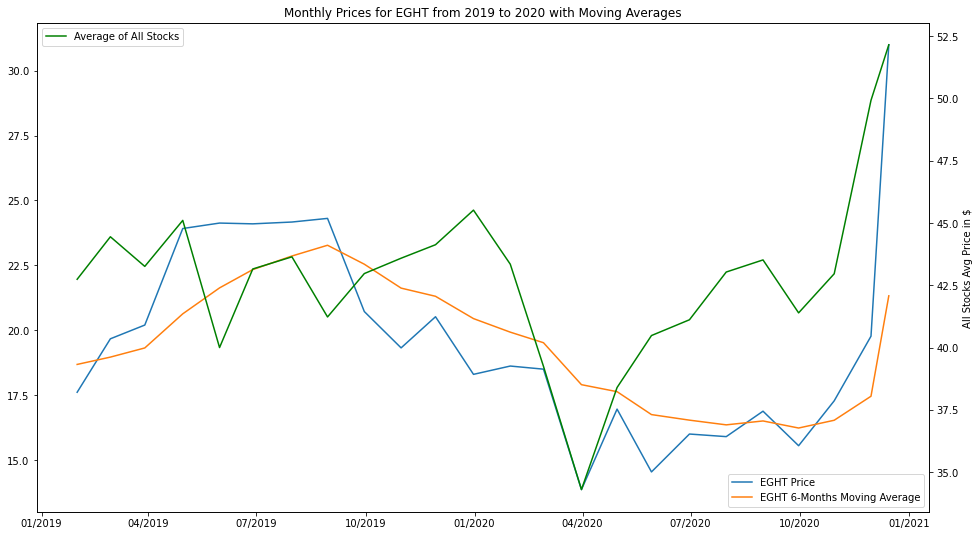

In [33]:
start_date = '2019-01-31'
end_date = '2020-12-15'
tickers = top20['Ticker'].to_list()
for ticker in tickers:
    
    fig, ax1 = plt.subplots(figsize=(16,9))
    my_year_month_fmt = dates.DateFormatter('%m/%Y')
    choice_ema = choice.ewm(span=6, adjust=False).mean()
    ax1.plot(choice.loc[start_date:end_date, :].index, choice.loc[start_date:end_date, ticker], label=f'{ticker} Price')
    ax1.plot(choice_ema.loc[start_date:end_date, :].index, choice_ema.loc[start_date:end_date, ticker], label = f'{ticker} 6-Months Moving Average')
    ax2=ax1.twinx()
    ax2.plot(choice.loc[start_date:end_date, :].index, choice.loc[start_date:end_date, 'Total'],color='green',label='Average of All Stocks')
    ax1.legend(loc='lower right')
    ax2.legend(loc='best')
    ax.set_ylabel('Price in $')
    ax2.set_ylabel('All Stocks Avg Price in $')
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(my_year_month_fmt)
    ax1.set_title(f'Monthly Prices for {ticker} from 2019 to 2020 with Moving Averages')
    fig.savefig(f'images/{ticker}_avg_2019-2020.png')